<a href="https://colab.research.google.com/github/OJWatson/vacc_analysis_we/blob/main/Vaccine_Willingness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Analyzing Willingness to Vaccinate Using Python

In this analysis, we aim to explore how demographic and personal characteristics influence an individual's willingness to vaccinate.
We'll proceed through a series of steps using Python, leveraging libraries such as Pandas for data manipulation and Seaborn for visualization.
Here's how we approached the problem:



#### Step 1: Preparing the Data

We began by calculating the 2.5%, 50% (median), and 97.5% quantiles of 'willingness' for each unique 'name' in our dataset.
This statistical summary provides a sense of distribution that goes beyond simple averages. To achieve this, we used the `groupby` method in Pandas along with the `agg` function to apply different aggregations to various columns:


In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'clean_data.csv'
data = pd.read_csv(data_path)

# Group by 'name' to calculate quantiles and get unique values for other columns
grouped = data.groupby('name').agg({
    'willingness': [lambda x: x.quantile(0.025), 'mean', lambda x: x.quantile(0.975)],
    'age_2': 'first',
    'ethnicity_2': 'first',
    'income': 'first',
    'general_health': 'first',
    'lives_alone': 'first',
    'education': 'first',
    'location_type': 'first'
}).reset_index()

# Rename columns for clarity
grouped.columns = ['name', 'willingness_2.5%', 'willingness_mean', 'willingness_97.5%', 'age_2',
                   'ethnicity_2', 'income', 'general_health', 'lives_alone', 'education', 'location_type']

grouped.head()

,name,willingness_2.5%,willingness_mean,willingness_97.5%,age_2,ethnicity_2,income,general_health,lives_alone,education,location_type
0,Brian.O.Neill,2.000,3.640000,5.0,67,White European / White British,18000,Physical Disability,No,GCSEs,City
1,Chloe.Thomas,2.000,3.571429,5.0,42,White European / White British,40000,Mental Disability,No,University,City
2,Elizabeth.Morris,2.000,3.780000,5.0,80,White European / White British,21000,Physical Disability,Yes,A-levels,Rural
3,Fiona.Stewart,1.225,3.940000,5.0,38,Black / African / Caribbean / Black British,35000,Physical Disability,No,University,City
4,Gurdeep.Singh,2.000,3.760000,5.0,48,Asian / Asian British,60000,Healthy,No,A-levels,City



#### Step 2: Visualizing the Data

With our summary data in place, the next step was to visualize the relationship between various factors and willingness to vaccinate:

1. **Age and Income as Numerical Variables**: We used a scatter plot with error bars and a linear regression line to depict these relationships.
The error bars represent the range from the 2.5% to the 97.5% quantiles of willingness, providing an insight into the variability and confidence intervals.

2. **Categorical Variables**: For variables like ethnicity, general health, and education, point plots were more appropriate.
These plots were enhanced with error bars for each category, visually summarizing the central tendency and variability.


First, let's plot the relationship between age and willingness:

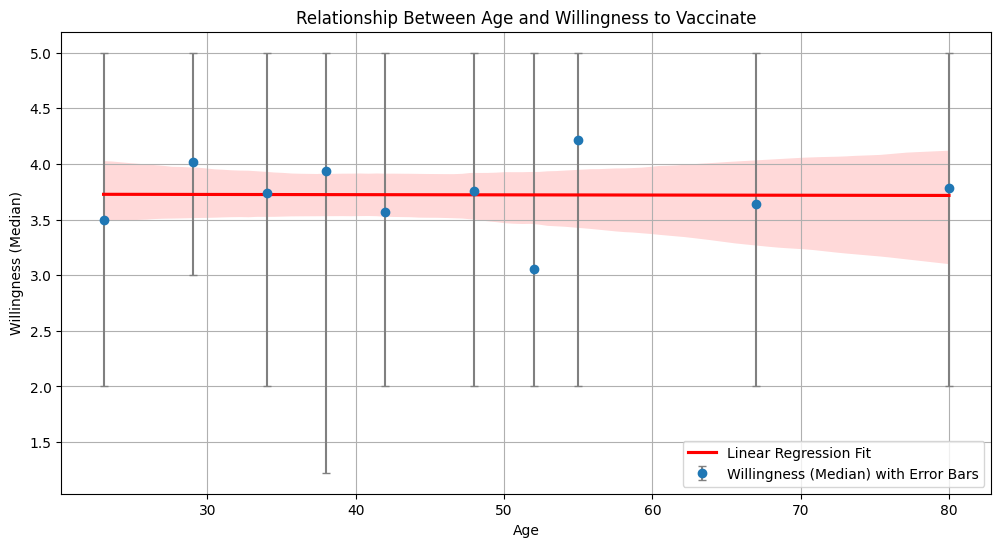

In [18]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot with error bars
errors = [grouped['willingness_mean'] - grouped['willingness_2.5%'],
          grouped['willingness_97.5%'] - grouped['willingness_mean']]
plt.errorbar(grouped['age_2'], grouped['willingness_mean'], yerr=errors, fmt='o', ecolor='gray', capsize=3, label='Willingness (Median) with Error Bars')

# Linear regression line
sns.regplot(x='age_2', y='willingness_mean', data=grouped, scatter=False, color='red', label='Linear Regression Fit')

# Adding titles and labels
plt.title('Relationship Between Age and Willingness to Vaccinate')
plt.xlabel('Age')
plt.ylabel('Willingness (Median)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

And next the same with respect to income:

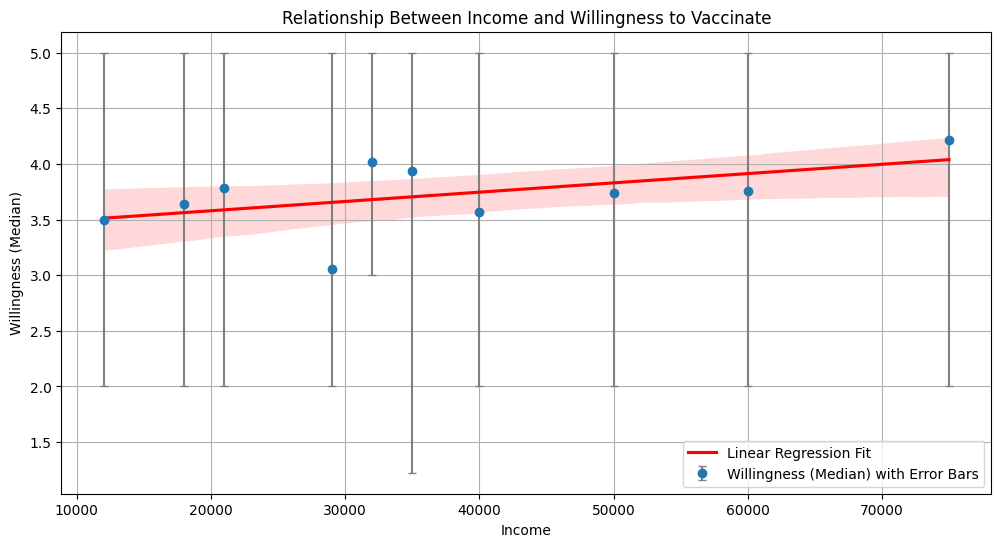

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot with error bars
plt.errorbar(grouped['income'], grouped['willingness_mean'], yerr=errors, fmt='o', ecolor='gray', capsize=3, label='Willingness (Median) with Error Bars')

# Linear regression line
sns.regplot(x='income', y='willingness_mean', data=grouped, scatter=False, color='red', label='Linear Regression Fit')

# Adding titles and labels
plt.title('Relationship Between Income and Willingness to Vaccinate')
plt.xlabel('Income')
plt.ylabel('Willingness (Median)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


We have now shown how to do this for continuous variables. We should also look for differences in the ethnicity with respect to willingness to vaccinate.

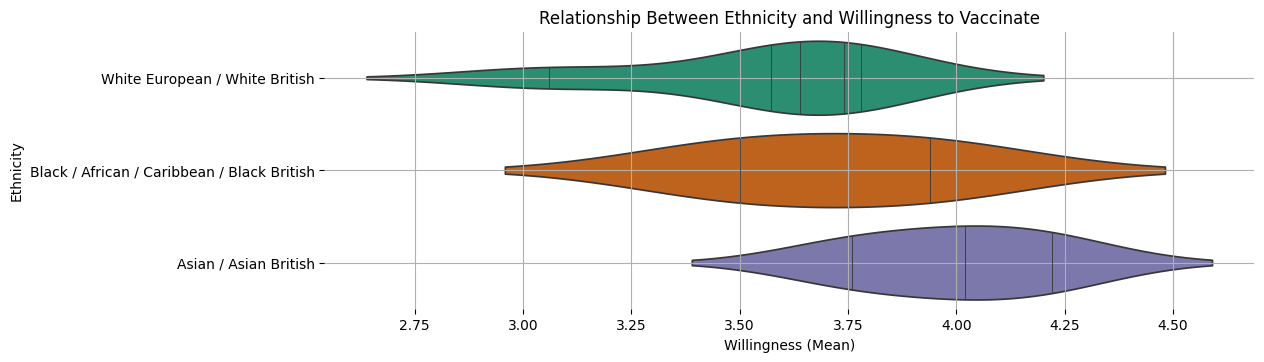

In [20]:
figsize = (12, 1.2 * len(grouped['ethnicity_2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(grouped, x='willingness_mean', y='ethnicity_2', hue = "ethnicity_2", inner='stick', palette = "Dark2")
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Relationship Between Ethnicity and Willingness to Vaccinate')
plt.xlabel('Willingness (Mean)')
plt.ylabel('Ethnicity')
plt.grid(True)


Now we can plot the same for out other categorical variables

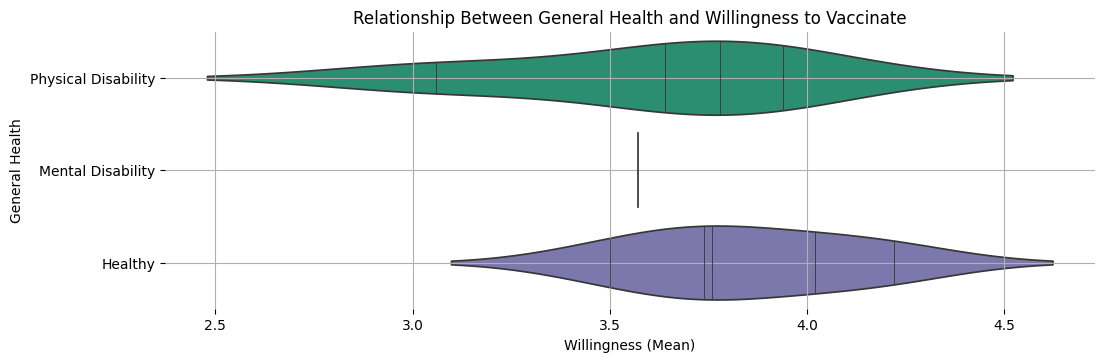

In [21]:
figsize = (12, 1.2 * len(grouped['general_health'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(grouped, x='willingness_mean', y='general_health', hue = "general_health", inner='stick', palette = "Dark2")
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Relationship Between General Health and Willingness to Vaccinate')
plt.xlabel('Willingness (Mean)')
plt.ylabel('General Health')
plt.grid(True)


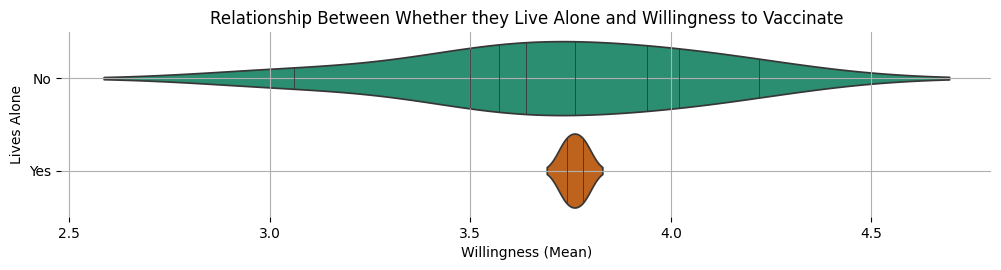

In [22]:
figsize = (12, 1.2 * len(grouped['lives_alone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(grouped, x='willingness_mean', y='lives_alone', hue = "lives_alone", inner='stick', palette = "Dark2")
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Relationship Between Whether they Live Alone and Willingness to Vaccinate')
plt.xlabel('Willingness (Mean)')
plt.ylabel('Lives Alone')
plt.grid(True)


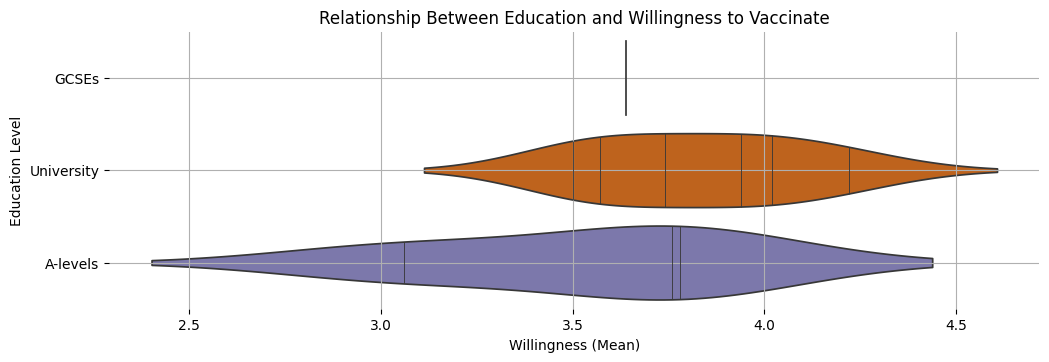

In [23]:
figsize = (12, 1.2 * len(grouped['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(grouped, x='willingness_mean', y='education', hue = "education", inner='stick', palette = "Dark2")
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Relationship Between Education and Willingness to Vaccinate')
plt.xlabel('Willingness (Mean)')
plt.ylabel('Education Level')
plt.grid(True)


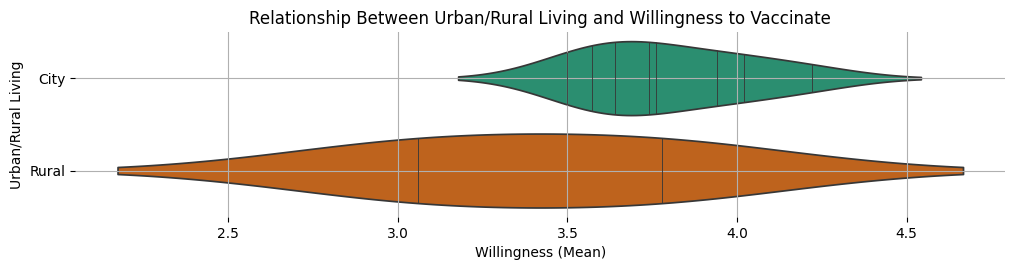

In [24]:
figsize = (12, 1.2 * len(grouped['location_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(grouped, x='willingness_mean', y='location_type', hue = "location_type", inner='stick', palette = "Dark2")
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Relationship Between Urban/Rural Living and Willingness to Vaccinate')
plt.xlabel('Willingness (Mean)')
plt.ylabel('Urban/Rural Living')
plt.grid(True)



#### Conclusion

Each plot generated provided unique insights. For example, the plots for categorical variables showed how different groups may have differing median willingness levels,
which could be pivotal for targeted public health messaging.

This kind of analysis is not just about running code but interpreting the results in a context that aids in decision-making.
By teaching you this through Python, I hope to not only improve your coding skills but also your ability to think analytically about real-world data.
